In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv',encoding = 'latin-1' )
df.head()

,Entity,Review,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  74682 non-null  object
 1   Review  74682 non-null  object
 2   Text    73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()

Entity      0
Review      0
Text      686
dtype: int64

In [ ]:
df.duplicated().sum()

3622

In [ ]:
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
df.shape

(70957, 3)

CallOfDuty                           2304
Verizon                              2301
MaddenNFL                            2293
NBA2K                                2290
TomClancysRainbowSix                 2287
Facebook                             2280
Microsoft                            2278
TomClancysGhostRecon                 2263
WorldOfCraft                         2248
johnson&johnson                      2247
ApexLegends                          2246
Battlefield                          2236
CallOfDutyBlackopsColdWar            2233
LeagueOfLegends                      2228
FIFA                                 2224
Dota2                                2218
Amazon                               2213
Overwatch                            2208
Hearthstone                          2201
GrandTheftAuto(GTA)                  2201
HomeDepot                            2199
Borderlands                          2192
Google                               2188
PlayStation5(PS5)                 

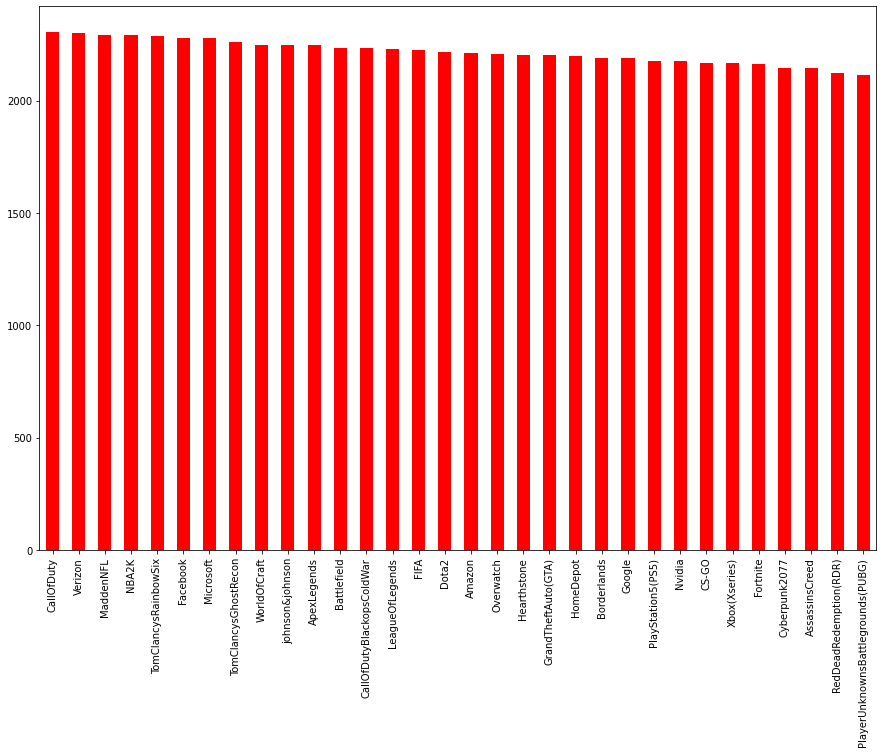

In [ ]:
plt.figure(figsize =(15,10))
print(df.Entity.value_counts())
df.Entity.value_counts().plot(kind='bar',color='red')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df[df['Entity']=='Google']['Text'][23340]

"Today's @Google's Greatest Hits: fire hydrant and hydrant over time.. . Spoiler: fire hydrant is about half the hydrant total.. . Question: what type(s) of hydrant(s) make up the other half?. . books.google.com/ngrams/graph?câ\x80¦"

In [ ]:
df[df['Entity']=='CallOfDuty']['Review'].value_counts()

Negative      855
Irrelevant    659
Positive      425
Neutral       365
Name: Review, dtype: int64

In [ ]:
df = df.drop(['Entity'],1)

<ipython-input-12-87113dcd3f79>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Entity'],1)


In [ ]:
df.head(2)

,Review,Text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...


Negative      21565
Positive      19549
Neutral       17397
Irrelevant    12446
Name: Review, dtype: int64


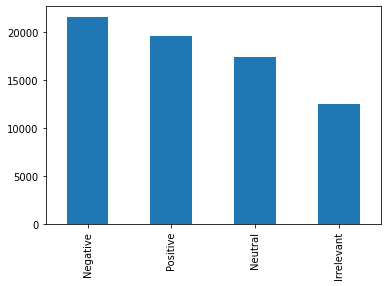

In [ ]:
print(df['Review'].value_counts())
df['Review'].value_counts().plot(kind = 'bar')
plt.show()

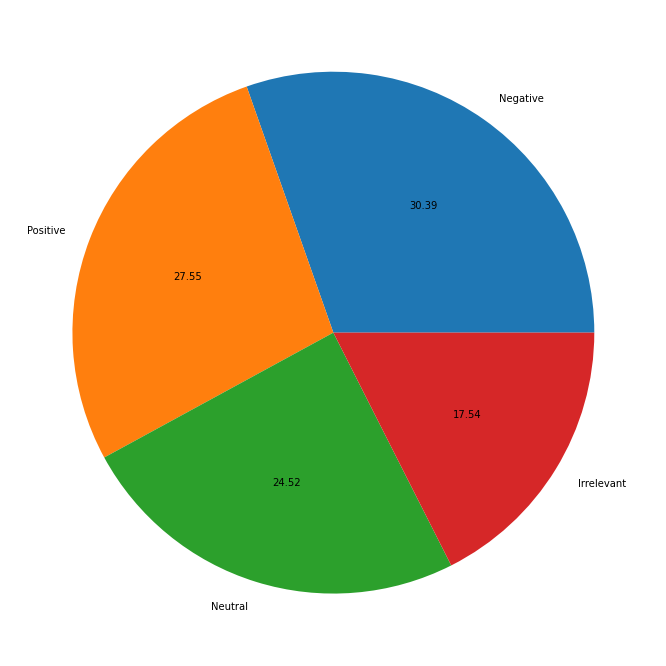

In [ ]:
plt.figure(figsize = (15,12))
plt.pie(df['Review'].value_counts(),labels = ['Negative','Positive','Neutral','Irrelevant'],autopct='%0.2f')
plt.show()

In [ ]:
# Applying LabelEncoder on Target Column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Review'] = encoder.fit_transform(df['Review'])

In [ ]:
df.sample(5)

,Review,Text
12656,2,@ Ron2K @ N2K Can ya plz add sum old and new k...
49947,3,My boyfriend spent hours today teaching me how...
5850,1,A N Y B O D Y WHO IS STILL ORDERING SHIT OFF A...
56014,2,Shoutout to my brother @CoconutBrah for he pro...
48302,1,This tweet didn't age well... @ HomeDepot didn...


In [ ]:
df.Review.value_counts()

1    21565
3    19549
2    17397
0    12446
Name: Review, dtype: int64

## Creation of Basic Features from Text

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Number of Characters

df['num_characters']=df['Text'].apply(len)

In [ ]:
df.head(2)

,Review,Text,num_characters
0,3,im getting on borderlands and i will murder yo...,53
1,3,I am coming to the borders and I will kill you...,51


In [ ]:
# Number of Words

df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(2)

,Review,Text,num_characters,num_words
0,3,im getting on borderlands and i will murder yo...,53,11
1,3,I am coming to the borders and I will kill you...,51,13


In [ ]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(2)

,Review,Text,num_characters,num_words,num_sentences
0,3,im getting on borderlands and i will murder yo...,53,11,1
1,3,I am coming to the borders and I will kill you...,51,13,1


### Comparison in Basic Features w.r.t Reviews

In [ ]:
# Negative Messages
df[df['Review']==3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,19549.000000,19549.000000,19549.000000
mean,98.984552,20.655635,1.837639
std,77.087598,16.608936,1.403077
min,1.000000,0.000000,0.000000
25%,40.000000,8.000000,1.000000
50%,78.000000,16.000000,1.000000
75%,138.000000,28.000000,2.000000
max,692.000000,198.000000,21.000000


In [ ]:
# Positive Messages
df[df['Review']==2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,17397.000000,17397.000000,17397.000000
mean,121.075818,24.162154,1.972754
std,76.442485,16.723733,1.548130
min,1.000000,0.000000,0.000000
25%,64.000000,12.000000,1.000000
50%,108.000000,20.000000,1.000000
75%,164.000000,33.000000,2.000000
max,957.000000,198.000000,25.000000


<b> Its number of characters are greater than that of negative messages

In [ ]:
# Neutral Messages
df[df['Review']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,21565.000000,21565.000000,21565.000000
mean,113.357848,23.350707,1.786831
std,80.019156,16.812554,1.269607
min,1.000000,0.000000,0.000000
25%,48.000000,10.000000,1.000000
50%,95.000000,19.000000,1.000000
75%,164.000000,34.000000,2.000000
max,727.000000,198.000000,21.000000


In [ ]:
# Irrelevant Messages
df[df['Review']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12446.000000,12446.000000,12446.000000
mean,112.636590,23.146794,1.915073
std,78.612218,16.886345,1.434445
min,1.000000,0.000000,0.000000
25%,52.000000,11.000000,1.000000
50%,94.000000,19.000000,1.000000
75%,157.000000,32.000000,2.000000
max,692.000000,198.000000,20.000000


## EDA

<Figure size 1080x864 with 0 Axes>

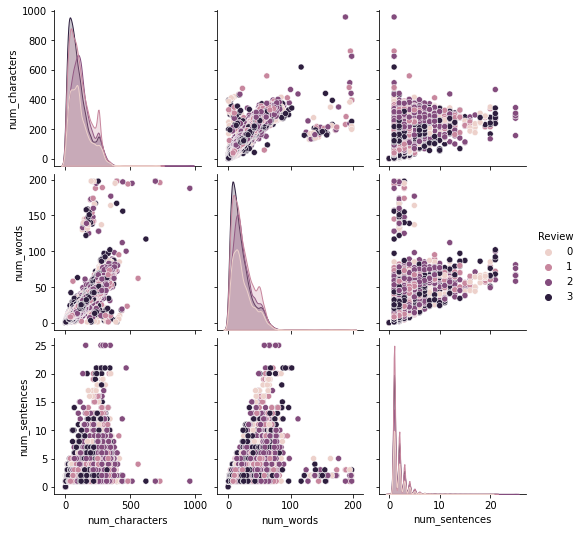

In [ ]:
plt.figure(figsize = (15,12))
sns.pairplot(df,hue= 'Review')
plt.show()

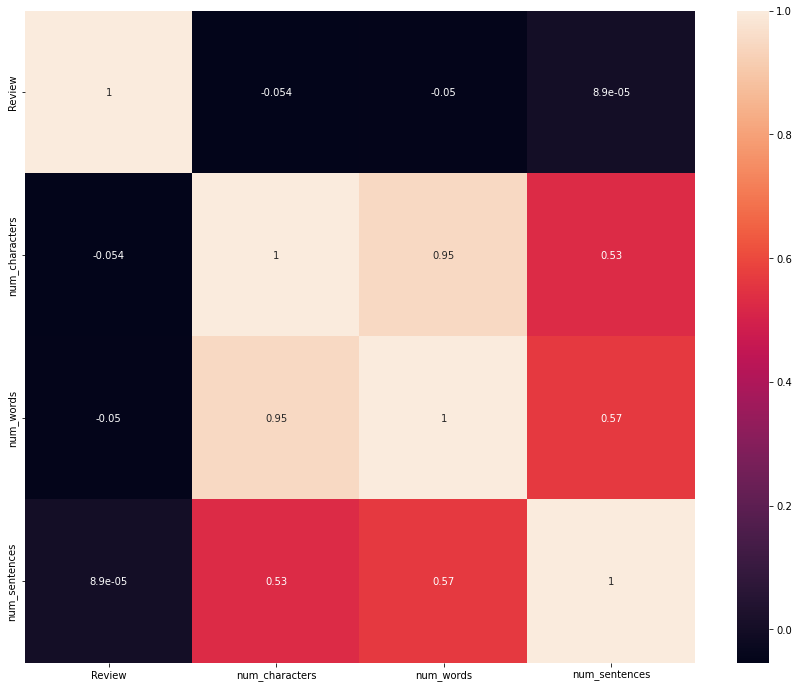

In [ ]:
# To show correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

<b><b>  It shows input variables(such as num_characters, num_words and num_sentences) have strong correlation with each other so multicollinearity problem exists. We will have to keep one variable (which will be num_sentences as it has more correlation with target/sentiment variable than other columns)

## Data Preprocessing

i. Lower case</br>
ii. Tokenization</br>
iii. Removing Special Characters</br>
iv. Removing Stop Words and Punctuation</br>
v. Stemming

In [ ]:
# List of stopwords in English

from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Punctuation marks

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  # lemma = nltk.WordNetLemmatizer() # define lemmatizer

In [ ]:
def transform_text(text):
    text = text.lower() # Lowercasing
    text = nltk.word_tokenize(text) # Tokenization
    text = re.sub("[^a-zA-Z]", " ", str(text)) # Remove non-letters
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuation
    text = re.sub(' +', ' ',text) # Remove extra spaces
    text = text.strip() # Remove whitespaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # Remove stopwords
    text = ' '.join([ps.stem(word) for word in text.split()]) # Stemming  # OR ' '.join([lemma.lemmatize(word) for word in text.split()])
    
    return text

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon n want talk stuff anymor tonight k cri enough today'

In [ ]:
df1 = df.sample(10000)

In [ ]:
df1.Review.value_counts()

1    3032
3    2759
2    2425
0    1784
Name: Review, dtype: int64

In [ ]:
df1['Text'] = df1['Text'].apply(transform_text)
df1.head(2)

,Review,Text,num_characters,num_words,num_sentences
35497,1,xbox server stand still hack,46,12,2
49646,0,last weekend could finish strong de bruyn abso...,105,17,2


In [ ]:
# Remove url links

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [ ]:
df1['Text'] = df1['Text'].apply(remove_url)

In [ ]:
df1.sample(2)

,Review,Text,num_characters,num_words,num_sentences
49966,1,around worker major read full stori compani re...,111,24,3
55383,1,dear activis infinityward callofduti x x call ...,167,34,1


In [ ]:
df['Text'][12515]

"I shouldn't spoil, I follow A handful of NBA 2K content creators and seeing everyone hit on the nail right down makes me even more excited for"

In [ ]:
# Forming WordCloud which will highligh important words in both positive and negative messages

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size =10, background_color = 'white')

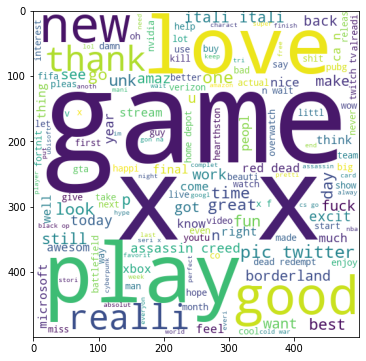

In [ ]:
# Negative messages wordcloud

neg_wc = wc.generate(df1[df1['Review']==3]['Text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

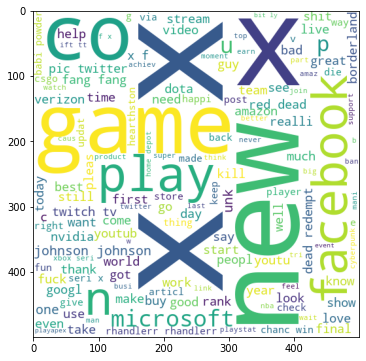

In [ ]:
# Positive messages wordcloud

pos_wc = wc.generate(df1[df1['Review']==2]['Text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

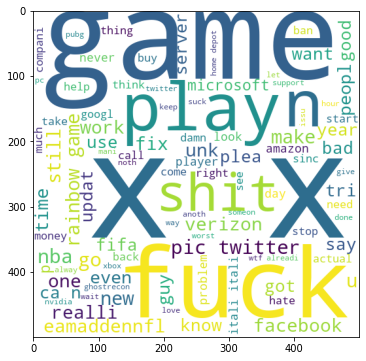

In [ ]:
# Neutral messages wordcloud

neu_wc = wc.generate(df1[df1['Review']==1]['Text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(neu_wc)

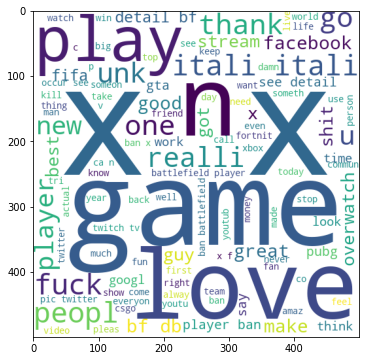

In [ ]:
# Irrelevant messages wordcloud

ir_wc = wc.generate(df1[df1['Review']==0]['Text'].str.cat(sep = " "))
plt.figure(figsize=(15,6))
plt.imshow(ir_wc)

In [ ]:
## Top words in each category

### Negative category

neg_corpus = []
for msg in df1[df1['Review']==3]['Text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [ ]:
len(neg_corpus)

29511

In [ ]:
from collections import Counter

Counter(neg_corpus) # Dictionary will be craeted showing how many times each word has appeared

Counter({'nice': 73,
         'st': 6,
         'time': 149,
         'classic': 13,
         'franchis': 12,
         'unk': 109,
         'box': 8,
         'shit': 56,
         'aight': 2,
         'ever': 64,
         'get': 158,
         'item': 7,
         'god': 25,
         'damn': 47,
         'fuck': 99,
         'life': 20,
         'bruh': 11,
         'sure': 22,
         'want': 86,
         'motherfuck': 5,
         'cour': 2,
         'juli': 7,
         'best': 170,
         'reveal': 15,
         'trailer': 25,
         'person': 16,
         'seen': 19,
         'aaa': 2,
         'game': 500,
         'set': 21,
         'ww': 3,
         'almost': 26,
         'unheard': 2,
         'incred': 26,
         'new': 173,
         'visual': 5,
         'record': 7,
         'fidel': 2,
         'still': 115,
         'open': 18,
         'look': 151,
         'bf': 4,
         'battlefield': 55,
         'took': 14,
         'uk': 13,
         'top': 22,
         'fp': 

In [ ]:
Counter(neg_corpus).most_common(30) # Most common words in negative

[('x', 868),
 ('game', 500),
 ('play', 345),
 ('love', 276),
 ('com', 276),
 ('good', 230),
 ('like', 207),
 ('n', 204),
 ('pic', 191),
 ('new', 173),
 ('thank', 171),
 ('best', 170),
 ('go', 170),
 ('realli', 169),
 ('one', 164),
 ('get', 158),
 ('twitter', 156),
 ('look', 151),
 ('time', 149),
 ('great', 136),
 ('fun', 127),
 ('still', 115),
 ('wait', 114),
 ('unk', 109),
 ('see', 108),
 ('borderland', 108),
 ('assassin', 107),
 ('day', 105),
 ('got', 103),
 ('creed', 102)]

In [ ]:
pd.DataFrame(Counter(neg_corpus).most_common(30))

,0,1
0,x,868
1,game,500
2,play,345
3,love,276
4,com,276
5,good,230
6,like,207
7,n,204
8,pic,191
9,new,173


In [ ]:
pd.DataFrame(Counter(neg_corpus).most_common(30))[0]

0              x
1           game
2           play
3           love
4            com
5           good
6           like
7              n
8            pic
9            new
10         thank
11          best
12            go
13        realli
14           one
15           get
16       twitter
17          look
18          time
19         great
20           fun
21         still
22          wait
23           unk
24           see
25    borderland
26      assassin
27           day
28           got
29         creed
Name: 0, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


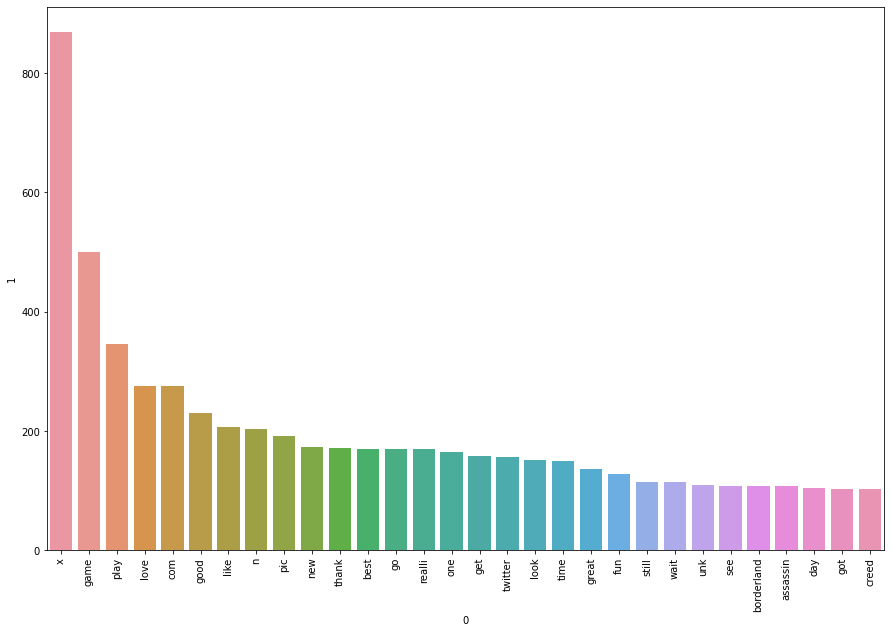

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(neg_corpus).most_common(30))[0],pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Positive category

pos_corpus = []
for msg in df1[df1['Review']==2]['Text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [ ]:
len(pos_corpus)

32389

In [ ]:
Counter(pos_corpus)

Counter({'merci': 3,
         'ambarkortiz': 2,
         'mad': 14,
         'make': 83,
         'pocket': 3,
         'bastion': 2,
         'lol': 22,
         'pixel': 1,
         'spray': 4,
         'cute': 3,
         'dart': 3,
         'human': 6,
         'ep': 3,
         'e': 39,
         'new': 125,
         'normal': 3,
         'appl': 18,
         'itun': 8,
         'com': 575,
         'us': 97,
         'podcast': 5,
         'dar': 1,
         'googl': 118,
         'feed': 8,
         'play': 221,
         'music': 17,
         'listen': 7,
         'spotifi': 6,
         'open': 17,
         'show': 41,
         'oyfdhim': 1,
         'iheartradio': 3,
         'iheart': 1,
         'da': 8,
         'pandora': 5,
         'amazon': 192,
         'alexa': 3,
         'http': 174,
         'enco': 2,
         'uczfirx': 1,
         'ip': 4,
         'earn': 39,
         'tast': 5,
         'histori': 12,
         'edit': 11,
         'leagu': 36,
         'legend':

In [ ]:
Counter(pos_corpus).most_common(30)[0]

('x', 1220)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


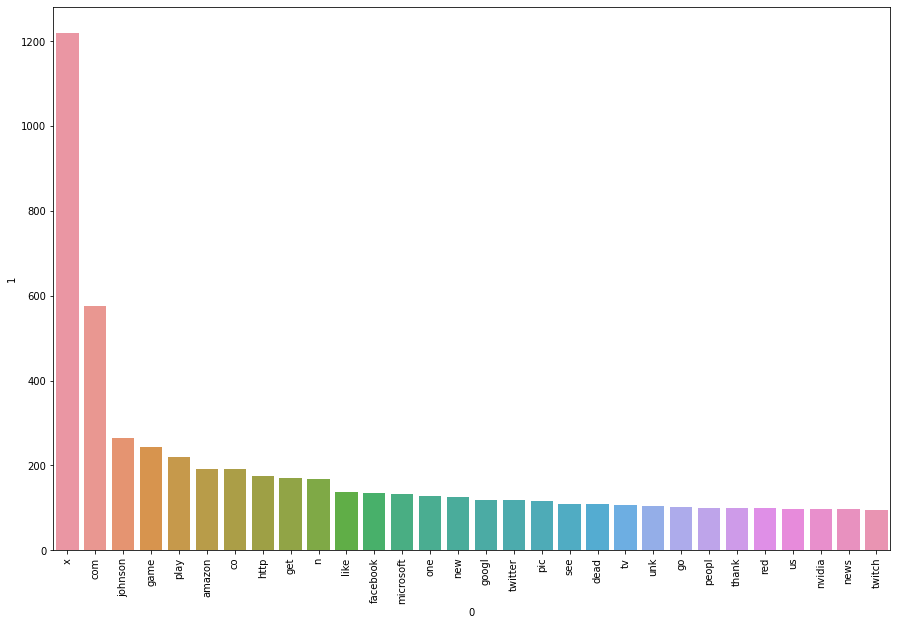

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(pos_corpus).most_common(30))[0],pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Negative category

neu_corpus = []
for msg in df1[df1['Review']==1]['Text'].tolist():
    for word in msg.split():
        neu_corpus.append(word)

In [ ]:
len(neu_corpus)

36847

In [ ]:
Counter(neu_corpus)

Counter({'xbox': 85,
         'server': 101,
         'stand': 12,
         'still': 149,
         'hack': 16,
         'verizon': 145,
         'data': 25,
         'crawl': 1,
         'morn': 15,
         'go': 162,
         'thing': 72,
         'simpl': 6,
         'read': 19,
         'comment': 7,
         'custom': 30,
         'complain': 10,
         'shadi': 5,
         'inform': 13,
         'see': 64,
         'tacki': 2,
         'disgust': 7,
         'especi': 10,
         'noth': 51,
         'fulli': 13,
         'good': 89,
         'came': 12,
         'run': 35,
         'pleas': 176,
         'wait': 50,
         'dont': 26,
         'mind': 10,
         'would': 78,
         'let': 55,
         'us': 91,
         'know': 97,
         'first': 62,
         'get': 347,
         'hope': 20,
         'narendramodi': 8,
         'pmoindia': 5,
         'help': 82,
         'twitter': 201,
         'remind': 6,
         'funni': 9,
         'part': 15,
         'mani':

In [ ]:
Counter(neu_corpus).most_common(30)[0]

('x', 1462)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


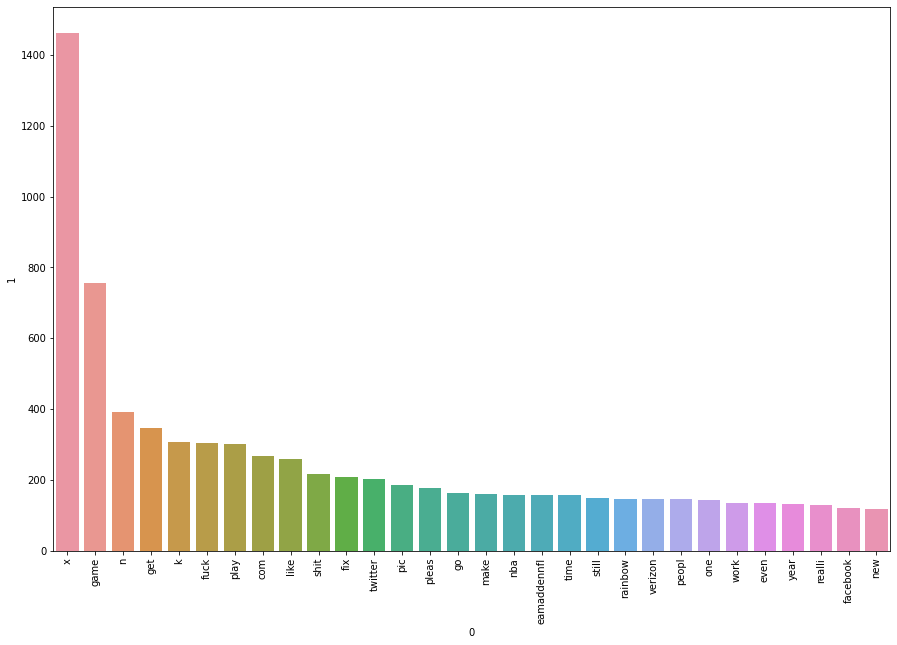

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(neu_corpus).most_common(30))[0],pd.DataFrame(Counter(neu_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Irrelevant category

ir_corpus = []
for msg in df1[df1['Review']==0]['Text'].tolist():
    for word in msg.split():
        ir_corpus.append(word)

In [ ]:
len(ir_corpus)

20749

In [ ]:
Counter(ir_corpus)

Counter({'last': 39,
         'weekend': 11,
         'could': 39,
         'finish': 9,
         'strong': 2,
         'de': 3,
         'bruyn': 1,
         'absolut': 20,
         'crazi': 18,
         'pic': 63,
         'wikipedia': 5,
         'org': 9,
         'n': 157,
         'svgp': 1,
         'btw': 4,
         'annoy': 6,
         'babi': 8,
         'went': 13,
         'georg': 3,
         'room': 4,
         'find': 19,
         'door': 6,
         'lock': 3,
         'climb': 4,
         'side': 5,
         'hous': 7,
         'look': 51,
         'window': 2,
         'expect': 4,
         'see': 134,
         'piti': 2,
         'girl': 16,
         'someth': 32,
         'play': 101,
         'fortnit': 42,
         'twitter': 79,
         'x': 757,
         'keep': 26,
         'k': 42,
         'pubg': 60,
         'famili': 12,
         'meme': 7,
         'take': 42,
         'com': 256,
         'cant': 10,
         'proud': 16,
         'boy': 20,
         '

In [ ]:
Counter(ir_corpus).most_common(30)[0]

('x', 757)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


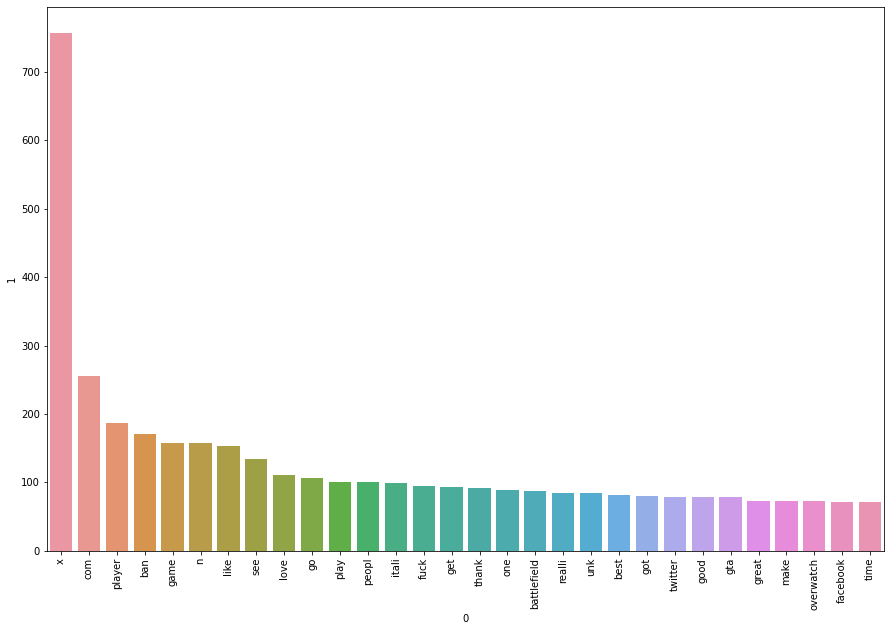

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(ir_corpus).most_common(30))[0],pd.DataFrame(Counter(ir_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [ ]:
## Creation of Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df1['Text']).toarray() # Use toarray() to convert sparse array into dense array
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(10000, 12553)

In [ ]:
y = df1['Review'].values
y

array([1, 0, 2, ..., 3, 2, 0])

In [ ]:
## Applying train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred1))
print('C.M: ',confusion_matrix(y_test,y_pred1))

Accuracy Score:  0.467
C.M:  [[269  32  33  35]
 [213 268  36  83]
 [149  72 184  87]
 [248  47  31 213]]


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred3))
print('C.M: ',confusion_matrix(y_test,y_pred3))

Accuracy Score:  0.57
C.M:  [[ 68 111  20 170]
 [  7 476  17 100]
 [ 23 127 171 171]
 [  4  87  23 425]]


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred2))
print('C.M: ',confusion_matrix(y_test,y_pred2))

Accuracy Score:  0.5995
C.M:  [[118 101  45 105]
 [ 22 487  28  63]
 [ 36 119 214 123]
 [ 16 101  42 380]]


In [ ]:
# Creation of Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(df1['Text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)\n'

In [ ]:
# Appending the num_character col to X
X = np.hstack((X,df1['num_sentences'].values.reshape(-1,1)))

In [ ]:
y = df1['Review'].values
y

array([1, 0, 2, ..., 3, 2, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred1))
print('C.M: ',confusion_matrix(y_test,y_pred1))

Accuracy Score:  0.4245
C.M:  [[259  38  32  40]
 [210 247  44  99]
 [186  76 136  94]
 [248  48  36 207]]


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred2))
print('C.M: ',confusion_matrix(y_test,y_pred2))

Accuracy Score:  0.5645
C.M:  [[ 71 121  45 132]
 [  7 480  30  83]
 [ 14 128 202 148]
 [  9 109  45 376]]


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred3))
print('C.M: ',confusion_matrix(y_test,y_pred3))

Accuracy Score:  0.569
C.M:  [[131  64  41 133]
 [ 35 411  40 114]
 [ 47  90 198 157]
 [ 27  64  50 398]]


<b> tfidf, num_sentences,mnb

In [ ]:
# Comparing results with other algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [ ]:
print('SVC: ',train_classifier(svc,X_train,y_train,X_test,y_test))
print('KNeighborsClassifier: ',train_classifier(knc,X_train,y_train,X_test,y_test))
print('MultinomialNB: ',train_classifier(mnb,X_train,y_train,X_test,y_test))
print('DecisionTreeClassifier: ',train_classifier(dtc,X_train,y_train,X_test,y_test))
print('LogisticRegression: ',train_classifier(lrc,X_train,y_train,X_test,y_test))
print('RandomForestClassifier: ',train_classifier(rfc,X_train,y_train,X_test,y_test))
print('AdaBoostClassifier: ',train_classifier(abc,X_train,y_train,X_test,y_test))
print('BaggingClassifier: ',train_classifier(bc,X_train,y_train,X_test,y_test))
print('ExtraTreesClassifier: ',train_classifier(etc,X_train,y_train,X_test,y_test))
print('GradientBoostingClassifier: ',train_classifier(gbdt,X_train,y_train,X_test,y_test))
print('XGBClassifier: ',train_classifier(xgb,X_train,y_train,X_test,y_test))

SVC:  0.3535
KNeighborsClassifier:  0.4215
MultinomialNB:  0.5645
DecisionTreeClassifier:  0.375
LogisticRegression:  0.5585
RandomForestClassifier:  0.629
AdaBoostClassifier:  0.4685
BaggingClassifier:  0.587
ExtraTreesClassifier:  0.663
GradientBoostingClassifier:  0.4975
XGBClassifier:  0.475


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('C.M: ',confusion_matrix(y_test,y_pred))

Accuracy Score:  0.563
C.M:  [[118 103  52  96]
 [ 34 462  42  62]
 [ 49 132 224  87]
 [ 43 111  63 322]]


In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('bc', bc), ('etc', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.6385


In [ ]:
# Applying stacking

estimators=[('mnb', mnb), ('lr', lrc), ('bc', bc)]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

<b> Thus extra trees classifier is best till now

In [ ]:
"""
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
"""